In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")


from pydataset import data
import prepare
import wrangle_zillow
import env

from scipy import stats
import math

In [2]:
df = wrangle_zillow.get_zillow_df()

In [3]:
df.shape


(52442, 70)

In [4]:
df.columns.unique

<bound method Index.unique of Index(['parcelid', 'typeconstructiontypeid', 'storytypeid',
       'heatingorsystemtypeid', 'buildingclasstypeid',
       'architecturalstyletypeid', 'airconditioningtypeid',
       'propertylandusetypeid', 'id', 'basementsqft', 'bathroomcnt',
       'bedroomcnt', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'latitude',
       'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'threequarterbathnbr',
  

In [5]:
df_1 = df["id"]


In [6]:
cols = []
count = 1
for column in df.columns:
    if column == 'id':
        cols.append(f'property_id_{count}')
        count+=1
        continue
    cols.append(column)
df.columns = cols

In [7]:
df.columns.unique

<bound method Index.unique of Index(['parcelid', 'typeconstructiontypeid', 'storytypeid',
       'heatingorsystemtypeid', 'buildingclasstypeid',
       'architecturalstyletypeid', 'airconditioningtypeid',
       'propertylandusetypeid', 'property_id_1', 'basementsqft', 'bathroomcnt',
       'bedroomcnt', 'buildingqualitytypeid', 'calculatedbathnbr',
       'decktypeid', 'finishedfloor1squarefeet',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12',
       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt',
       'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'latitude',
       'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum',
       'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'threequarterb

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52442 entries, 0 to 52441
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52442 non-null  int64  
 1   typeconstructiontypeid        76 non-null     float64
 2   storytypeid                   47 non-null     float64
 3   heatingorsystemtypeid         33936 non-null  float64
 4   buildingclasstypeid           0 non-null      float64
 5   architecturalstyletypeid      70 non-null     float64
 6   airconditioningtypeid         13638 non-null  float64
 7   propertylandusetypeid         52442 non-null  float64
 8   property_id_1                 52442 non-null  int64  
 9   basementsqft                  47 non-null     float64
 10  bathroomcnt                   52442 non-null  float64
 11  bedroomcnt                    52442 non-null  float64
 12  buildingqualitytypeid         33741 non-null  float64
 13  c

In [9]:
# this code line replaces the period on the columns with a space
import re
df.columns = [re.sub("[ ,-]", "_", re.sub("[\.,`,\$]", "", c)) for c in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52442 entries, 0 to 52441
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52442 non-null  int64  
 1   typeconstructiontypeid        76 non-null     float64
 2   storytypeid                   47 non-null     float64
 3   heatingorsystemtypeid         33936 non-null  float64
 4   buildingclasstypeid           0 non-null      float64
 5   architecturalstyletypeid      70 non-null     float64
 6   airconditioningtypeid         13638 non-null  float64
 7   propertylandusetypeid         52442 non-null  float64
 8   property_id_1                 52442 non-null  int64  
 9   basementsqft                  47 non-null     float64
 10  bathroomcnt                   52442 non-null  float64
 11  bedroomcnt                    52442 non-null  float64
 12  buildingqualitytypeid         33741 non-null  float64
 13  c

In [10]:
def handle_nulls(df):
    pct_null = df.isnull().sum() / len(df)
    missing_features = pct_null[pct_null > 0.20].index
    df.drop(missing_features, axis=1, inplace=True)
    df.dropna(inplace= True)
    return df

In [11]:
df_20 = handle_nulls(df)
df_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50674 entries, 0 to 52441
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      50674 non-null  int64  
 1   propertylandusetypeid         50674 non-null  float64
 2   property_id_1                 50674 non-null  int64  
 3   bathroomcnt                   50674 non-null  float64
 4   bedroomcnt                    50674 non-null  float64
 5   calculatedbathnbr             50674 non-null  float64
 6   calculatedfinishedsquarefeet  50674 non-null  float64
 7   finishedsquarefeet12          50674 non-null  float64
 8   fips                          50674 non-null  float64
 9   fullbathcnt                   50674 non-null  float64
 10  latitude                      50674 non-null  float64
 11  longitude                     50674 non-null  float64
 12  lotsizesquarefeet             50674 non-null  float64
 13  p

In [12]:
df.fips.value_counts()


6037.0    32822
6059.0    13522
6111.0     4330
Name: fips, dtype: int64

In [13]:
df["fips"] = pd.Categorical(df.fips) #converted fips data to categorical and changed the names to county names for readability purposes
df['fips'] = df['fips'].astype(str).apply(lambda x: x.replace('.0',''))

In [14]:
df["fips"].replace("6111",'Ventura', inplace=True)#converted fips data to county names 
df["fips"].replace("6059",'Orange', inplace=True)
df["fips"].replace("6037",'Los_Angeles', inplace=True)

In [15]:
df = df[df.calculatedfinishedsquarefeet <= 6000] #removed outliers by cutting houses over 60000 sqfeet, below 70feet
df = df[df.calculatedfinishedsquarefeet>70] #removes outliers below 70 sqfeet
df = df[df.taxvaluedollarcnt<=1_200_000]#removed houses over 1.2 million in dollar amount to remove outliers
df = df[df.bedroomcnt <=6]# removed houses above 6 bedrooms/
df = df[df.bathroomcnt <=6] # and 6baths  in order to have a normal distribution
df = df[df.logerror <= 2]
df = df[df.logerror>= -2]
df = drop[""]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46838 entries, 0 to 52441
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      46838 non-null  int64  
 1   propertylandusetypeid         46838 non-null  float64
 2   property_id_1                 46838 non-null  int64  
 3   bathroomcnt                   46838 non-null  float64
 4   bedroomcnt                    46838 non-null  float64
 5   calculatedbathnbr             46838 non-null  float64
 6   calculatedfinishedsquarefeet  46838 non-null  float64
 7   finishedsquarefeet12          46838 non-null  float64
 8   fips                          46838 non-null  object 
 9   fullbathcnt                   46838 non-null  float64
 10  latitude                      46838 non-null  float64
 11  longitude                     46838 non-null  float64
 12  lotsizesquarefeet             46838 non-null  float64
 13  p

In [49]:
df.columns.values.tolist()

['parcelid',
 'propertylandusetypeid',
 'property_id_1',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertycountylandusecode',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'max_transactiondate',
 'id1',
 'logerror',
 'transactiondate',
 'propertylandusedesc']

In [53]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
newdf

,parcelid,propertylandusetypeid,property_id_1,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fullbathcnt,latitude,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id1,logerror
0,14297519,261.0,1727539,3.5,4.0,3.5,3100.0,3100.0,3.0,33634931.0,...,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0,0.025595
1,17052889,261.0,1387261,1.0,2.0,1.0,1465.0,1465.0,1.0,34449266.0,...,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,1,0.055619
2,14186244,261.0,11677,2.0,3.0,2.0,1243.0,1243.0,2.0,33886168.0,...,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,2,0.005383
3,12177905,261.0,2288172,3.0,4.0,3.0,2376.0,2376.0,3.0,34245180.0,...,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,3,-0.103410
4,12095076,261.0,781532,3.0,4.0,3.0,2962.0,2962.0,3.0,34145202.0,...,0.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,6,-0.001011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52437,11000655,261.0,673515,2.0,2.0,2.0,1286.0,1286.0,2.0,34245368.0,...,0.0,1940.0,70917.0,354621.0,2016.0,283704.0,4478.43,6.037101e+13,77609,0.020615
52438,17239384,261.0,2968375,2.0,4.0,2.0,1612.0,1612.0,2.0,34300140.0,...,7.0,1964.0,50683.0,67205.0,2016.0,16522.0,1107.48,6.111008e+13,77610,0.013209
52439,12773139,261.0,1843709,1.0,3.0,1.0,1032.0,1032.0,1.0,34040895.0,...,0.0,1954.0,32797.0,49546.0,2016.0,16749.0,876.43,6.037434e+13,77611,0.037129
52440,12826780,261.0,1187175,2.0,3.0,2.0,1762.0,1762.0,2.0,33937685.0,...,0.0,1955.0,140000.0,522000.0,2016.0,382000.0,6317.15,6.037503e+13,77612,0.007204


In [46]:
def handle_outliers(df, cols, k):
    # Create placeholder dictionary for each columns bounds
    bounds_dict = {}

    # get a list of all columns that are not object type
    non_object_cols = df.dtypes[df.dtypes != 'object'].index


    for col in non_object_cols:
        # get necessary iqr values
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound =  q3 + k * iqr
        lower_bound =  q1 - k * iqr

        #store values in a dictionary referencable by the column name
        #and specific bound
        bounds_dict[col] = {}
        bounds_dict[col]['upper_bound'] = upper_bound
        bounds_dict[col]['lower_bound'] = lower_bound

    for col in non_object_cols:
        #retrieve bounds
        col_upper_bound = bounds_dict[col]['upper_bound']
        col_lower_bound = bounds_dict[col]['lower_bound']

        #remove rows with an outlier in that column
        df = df[(df[col] < col_upper_bound) & (df[col] > col_lower_bound)]
    
    return df

In [48]:
handle_outliers(df, df.columns, 1.5)

,parcelid,propertylandusetypeid,property_id_1,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,max_transactiondate,id1,logerror,transactiondate,propertylandusedesc


In [39]:
np.quantile

<function numpy.quantile(a, q, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=False)>

In [17]:
train, validate, test = prepare.split_data(df)

array([[<AxesSubplot:title={'center':'parcelid'}>,
        <AxesSubplot:title={'center':'propertylandusetypeid'}>,
        <AxesSubplot:title={'center':'property_id_1'}>,
        <AxesSubplot:title={'center':'bathroomcnt'}>,
        <AxesSubplot:title={'center':'bedroomcnt'}>],
       [<AxesSubplot:title={'center':'calculatedbathnbr'}>,
        <AxesSubplot:title={'center':'calculatedfinishedsquarefeet'}>,
        <AxesSubplot:title={'center':'finishedsquarefeet12'}>,
        <AxesSubplot:title={'center':'fullbathcnt'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'lotsizesquarefeet'}>,
        <AxesSubplot:title={'center':'rawcensustractandblock'}>,
        <AxesSubplot:title={'center':'regionidcity'}>,
        <AxesSubplot:title={'center':'regionidcounty'}>],
       [<AxesSubplot:title={'center':'regionidzip'}>,
        <AxesSubplot:title={'center':'roomcnt'}>,
        <AxesSubplot:title=

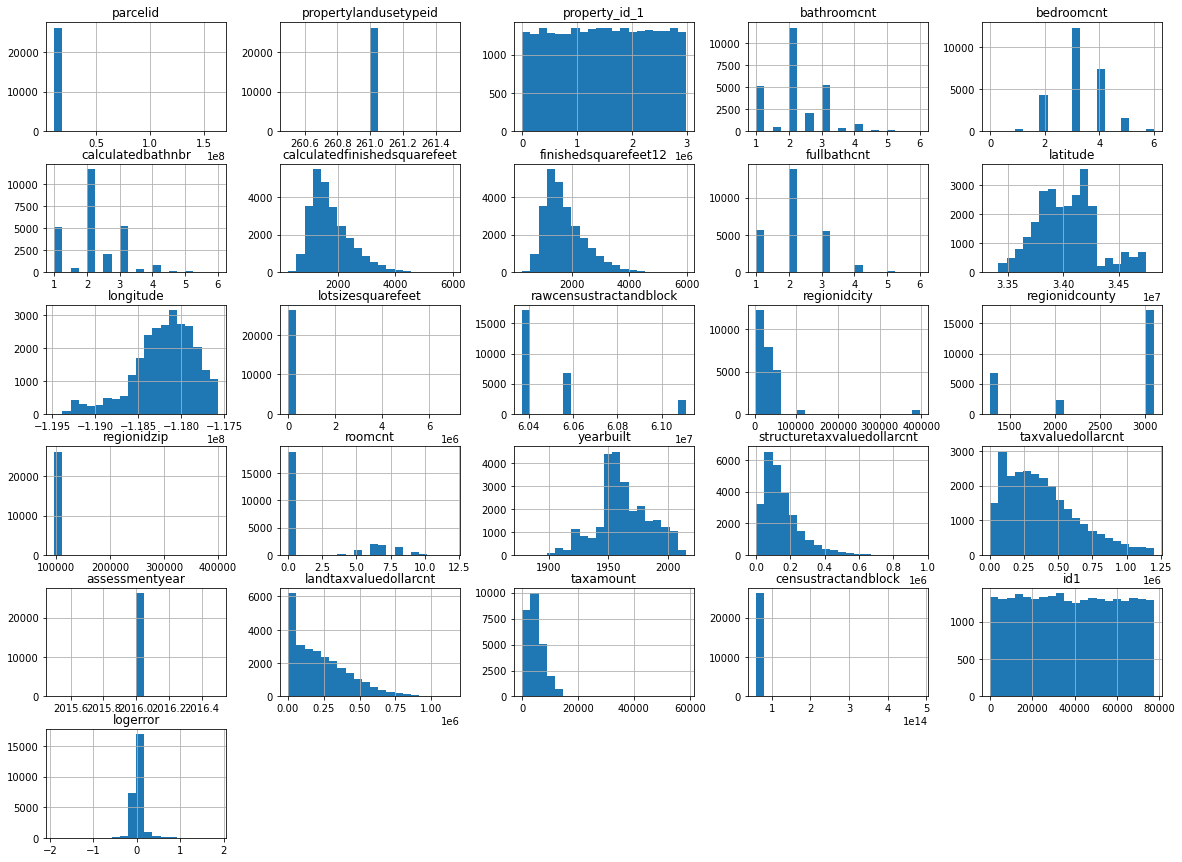

In [18]:
train.hist(bins = 20,figsize =  (20,15))


In [ ]:
df.logerror

No handles with labels found to put in legend.


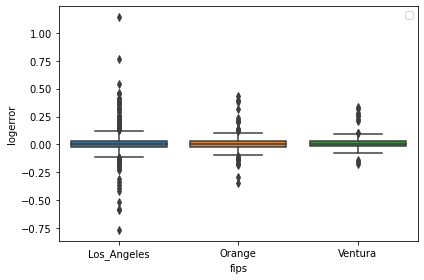

No handles with labels found to put in legend.


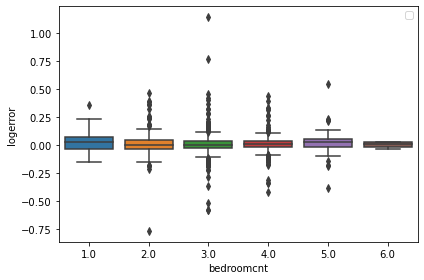

In [22]:
train_drop = train[['fips', 'bedroomcnt']].sample(1000)
target = train["logerror"]
for col in train_drop:
    sns.boxplot(x=train_drop[col], y=target, data=train_drop)
    plt.ylabel('logerror')
    plt.xlabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()

No handles with labels found to put in legend.


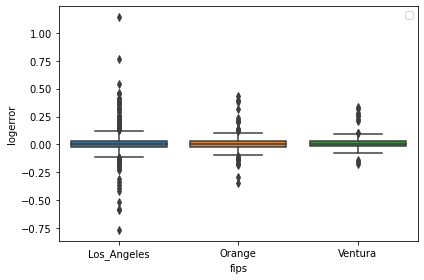

No handles with labels found to put in legend.


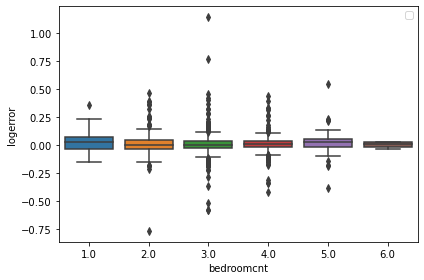

<AxesSubplot:xlabel='yearbuilt', ylabel='taxvaluedollarcnt'>

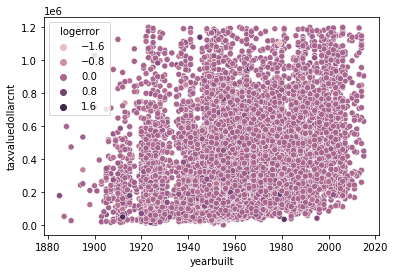

In [42]:
sns.scatterplot(x="yearbuilt", y="taxvaluedollarcnt", hue ="logerror", data=train.sample(10000))
